# Title

**Exercise: A.1 - Beta values for data from Random Universe**

# Description
Given a RandomUniverse(dataframe)->dataframe function that gives a new dataset from a "parallel" universe, calculate the $\beta_0$ 's and $\beta_1$ 's and plot a histogram like the one below. 

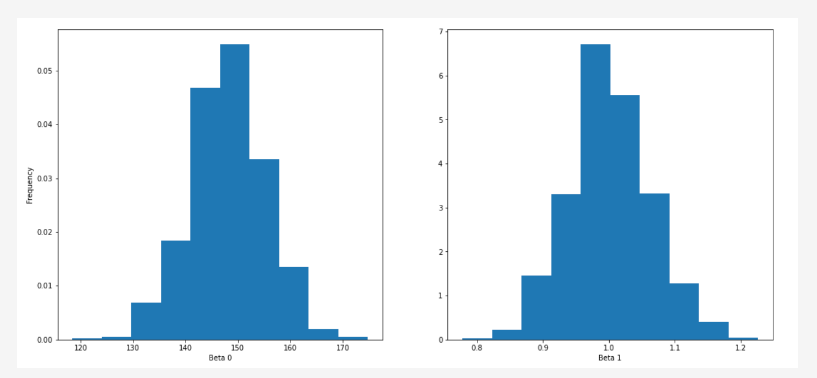

# Roadmap
- Get a new dataframe using the RandomUniverse function already provided in the exercise
- Calculate $\beta_0$, $\beta_1$ for that particular dataframe
- Add the calculated $\beta_0$ and $\beta_1$ values to a python list
- Plot a histogram using the lists calculated above

Change the number of `parallelUniverses` and comment on what you observe. Discuss within the group why you see this behavior. Did you expect the spread to change? Why or why not? 

# Hints

- To compute the beta values use the following equations:

$\beta_{0}=\bar{y}-\left(b_{1} * \bar{x}\right)$

$\beta_{1}=\frac{\sum(x-\bar{x}) *(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

where $\bar{x}$ is the mean of $x$ and $\bar{y}$ is the mean of $y$


<a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html" target="_blank">np.dot()</a> : Computes the dot product of two arrays

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.hist.html" target="_blank">ax.hist()</a> : Plots a histogram

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html" target="_blank">ax.set_xlabel()</a> : Sets label for x-axis

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html" target="_blank">ax.set_ylabel()</a> : Sets label for the y-axis

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def RandomUniverse(df):
    df_bootstrap = df.sample(len(df), replace=True)
    return df_bootstrap

### Reading the standard Advertising dataset

In [35]:
df = pd.read_csv('Advertising_adj.csv')

In [36]:
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [37]:
#Create two empty lists that will store the beta values
beta0_list, beta1_list = [],[]


#Choose the number of "parallel" Universes to generate the new dataset
parallelUniverses = 1000

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)

# x is the predictor variable given by 'tv' values 
# y is the reponse variable given by 'sales' values
    x = df_new.tv.to_numpy()
    y = df_new.sales.to_numpy()
#Find the mean of the x values
    xmean = x.mean()

#Find the mean of the y values
    ymean = y.mean()

# Using Linear Algebra as discussed in lecture for beta0 and beta1

    beta1 = np.sum((x-xmean)*(y-ymean)) / np.sum((x-xmean)**2)
    beta0 = ymean - beta1 * xmean

# Append the calculated values of beta1 and beta0
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [38]:
### edTest(test_beta) ###
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)

### Now we plot the histograms

Returns a plot for a histogram

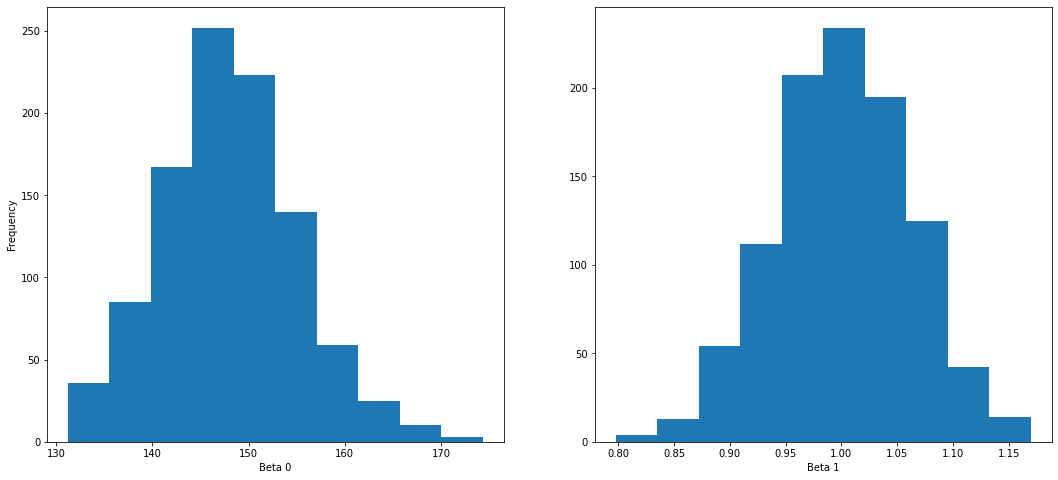

In [39]:
# plot histogram of 
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');

## Discussion
Change the number of `parallelUniverses` and comment on what you observe. Discuss within the group why you see this behavior. Did you expect the spread to change? Why or why not? 

# Fin

![Fin](https://media.giphy.com/media/jc1dl9ywZPryw/giphy.gif)